##### Loading dependencies

In [1]:
from myapp.models import Page, Batch
import numpy as np
import pandas as pd
import networkx as nx
import pygraphviz as pgv
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph

##### Display all batches

In [2]:
for batch in Batch.objects.all():
    print(batch.name+" - pk:"+str(batch.pk))

1862-1867 de Generalbericht  - pk:1


##### Set the batch id of the batch you want to explore

In [3]:
batch_pk=1

In [4]:
batch = Batch.objects.get(pk=batch_pk)
batch

<Batch: 1862-1867 de Generalbericht >

In [9]:
entity_type = Person # can be Entity (i,e any type of entity), Person, Place, Organisation or Term

##### Go through the batch's pages and extract instances of 'entity_types', then build and prints the co-occurence matrix 

In [10]:
entities_per_page = []
for page in batch.pages.all():
    entities_per_page.append([str(ent) for ent in page.entities.instance_of(entity_type).all()])
df = pd.DataFrame(entities_per_page)
u = (pd.get_dummies(df, prefix='', prefix_sep='')
    .groupby(level=0, axis=1)
    .sum())
v = u.T.dot(u)
v.values[(np.r_[:len(v)], ) * 2] = 0
matrix = v
matrix

Akademie der Wissenschaften  Annales  \
Akademie der Wissenschaften                                 0        0   
Annales                                                     0        0   
Astronomen Prof. Dr.\nSelander                              0        0   
Baeyer                                                      1        0   
Berichterstatter                                            0        0   
...                                                       ...      ...   
Zwei Chronometer                                            0        0   
Zwei Ingenieure                                             0        0   
marschall-Lieutenants v. Fligely                            0        0   
mehrfache Störungen                                         0        0   
we ya on ee\n\n                                             0        0   

                                  Astronomen Prof. Dr.\nSelander  Baeyer  \
Akademie der Wissenschaften                                    0       1   
Annales                                                        0       0   
Astronomen Prof. Dr.\nSelander                                 0       0   
Baeyer                                                         0       0   
Berichterstatter                                               1       0   
...                                                          ...     ...   
Zwei Chronometer                                               0       0   
Zwei Ingenieure                                                0       0   
marschall-Lieutenants v. Fligely                               0       0   
mehrfache Störungen                                            0       0   
we ya on ee\n\n                                                0       0   

                                  Berichterstatter  Beschlüssen  Boscovich  \
Akademie der Wissenschaften                      0            0          0   
Annales                                          0            0          0   
Astronomen Prof. Dr.\nSelander                   1            0          0   
Baeyer                                           0            0          0   
Berichterstatter                                 0            0          0   
...                                            ...          ...        ...   
Zwei Chronometer                                 0            0          0   
Zwei Ingenieure                                  0            0          0   
marschall-Lieutenants v. Fligely                 0            0          0   
mehrfache Störungen                              0            0          0   
we ya on ee\n\n                                  0            0          0   

                                  Bureau de P’Etat  \
Akademie der Wissenschaften                      0   
Annales                                          0   
Astronomen Prof. Dr.\nSelander                   0   
Baeyer                                           0   
Berichterstatter                                 0   
...                                            ...   
Zwei Chronometer                                 0   
Zwei Ingenieure                                  0   
marschall-Lieutenants v. Fligely                 0   
mehrfache Störungen                              0   
we ya on ee\n\n                                  0   

                                  CH TTT PTT NOTE IR “TTY YT RTL TV |  \
Akademie der Wissenschaften                                         0   
Annales                                                             0   
Astronomen Prof. Dr.\nSelander                                      0   
Baeyer                                                              0   
Berichterstatter                                                    0   
...                                                               ...   
Zwei Chronometer                                                    0   
Zwei Ingenieure                                               

##### Create networkx graph and draws it with Matplotlib

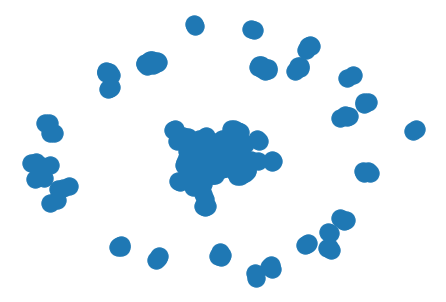

In [13]:
a = v.stack()
a = a[a >= 1].rename_axis(('source', 'target')).reset_index(name='weight')
G = nx.from_pandas_edgelist(a,  edge_attr=True)
nx.draw(G)

In [16]:
nx.write_weighted_edgelist(G, 'edges.csv', comments='#', delimiter=';', encoding='utf-8')

##### Draw graph with graphviz (not working yet)

In [ ]:
# set defaults
G.graph['graph']={'rankdir':'TD'}
G.graph['node']={'shape':'circle'}
G.graph['edges']={'arrowsize':'4.0'}

A = to_agraph(G)
A.layout('dot')
A.draw('./test.png')

##### Save dataframe as csv on server

In [ ]:
csv_file_name = 'test.csv' # put filename here - it will be available on the jupyter file browser in the exports folder 

In [ ]:
df.to_csv('./exports/'+csv_file_name, index=False)
